In [111]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [112]:
data = pd.read_csv('./datasets/train_data.csv')
data.head()

,text,label
0,The fact that every single major department of...,0
1,He added that himself and families and women i...,0
2,"BTW , here 's a statement which our apex court...",0
3,Hospitals fill as Rohingya refugees shiver thr...,1
4,But in pregnant women it can cause microcephal...,0


Bag of words model
Naive Bayesian Classification

In [113]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
# X = cv.fit_transform(data['text']).toarray()
# y = data['label'].values

# train test split
from sklearn.model_selection import train_test_split


In [114]:
# train_data = pd.read_csv('./datasets/train_data.csv')
test_data = pd.read_csv('./datasets/test_data.csv')
train_data = pd.read_csv('./datasets/train_data_balanced.csv')
# find the null values and remove them
print(train_data.isnull().sum())
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
# find the null values and remove them
print(test_data.isnull().sum())
X_train, y_train = train_data['text'], train_data['label']
X_test, y_test = test_data['text'], test_data['label']
test_data.dropna(inplace=True)
val_data = pd.read_csv('./datasets/val_data.csv')
val_data.dropna(inplace=True)
X_val, y_val = val_data['text'], val_data['label']

text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


In [115]:


def train(X_train, y_train, X_test, y_test, cv, model):
    bow = cv.fit_transform(X_train)
    model.fit(bow, y_train)
    # test
    test_bow = cv.transform(X_test)
    print("accuracy: ", model.score(test_bow, y_test))
    # F1 score
    from sklearn.metrics import f1_score
    y_pred = model.predict(test_bow)
    print("F1 score: ", f1_score(y_test, y_pred))



### Baseline1 Naive Bayes

In [116]:
# naive bayes

from sklearn.naive_bayes import MultinomialNB
def NB(X_train, y_train, X_test, y_test, X_val, y_val, cv):
    model = MultinomialNB()
    train(X_train, y_train, X_val, y_val, cv, model)
    train(X_train, y_train, X_val, y_val, cv, model)

In [117]:
NB(X_train, y_train, X_test, y_test, X_val, y_val, cv)

accuracy:  0.8758949880668258
F1 score:  0.4408602150537634
accuracy:  0.8758949880668258
F1 score:  0.4408602150537634


### Baseline 2: Logistic Regression

In [118]:
# logistic regression
from sklearn.linear_model import LogisticRegression
def LR(X_train, y_train, X_test, y_test, X_val, y_val, cv):
    model = LogisticRegression()
    train(X_train, y_train, X_test, y_test, cv, model)
    train(X_train, y_train, X_val, y_val, cv, model)

In [119]:
LR(X_train, y_train, X_test, y_test, X_val, y_val, cv)

d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8662207357859532
F1 score:  0.33014354066985646
accuracy:  0.8842482100238663
F1 score:  0.45197740112994345


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
train_data = pd.read_csv('./datasets/train_data.csv')
test_data = pd.read_csv('./datasets/test_data.csv')
# train_data = pd.read_csv('./datasets/train_data_balanced.csv')
# find the null values and remove them
print(train_data.isnull().sum())
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
# find the null values and remove them
print(test_data.isnull().sum())
X_train, y_train = train_data['text'], train_data['label']
X_test, y_test = test_data['text'], test_data['label']
test_data.dropna(inplace=True)
val_data = pd.read_csv('./datasets/val_data.csv')
val_data.dropna(inplace=True)
X_val, y_val = val_data['text'], val_data['label']


text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


### Original DataSet without data augumentation

In [121]:
NB(X_train, y_train, X_test, y_test, X_val, y_val, cv)
LR(X_train, y_train, X_test, y_test, X_val, y_val, cv)

accuracy:  0.89618138424821
F1 score:  0.02247191011235955
accuracy:  0.89618138424821
F1 score:  0.02247191011235955


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.9001433349259437
F1 score:  0.2614840989399293
accuracy:  0.9033412887828163
F1 score:  0.3305785123966942


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Downsampling

In [122]:
# extract the data with 0 label, the same snumber of 1 label
# and combine them together
# 0 label
data_0 = train_data[train_data['label'] == 0]
# 1 label
data_1 = train_data[train_data['label'] == 1]
# combine them together
n = int(len(data_1)*2)
data_0 = data_0.sample(n , random_state=42)
data = pd.concat([data_0, data_1], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
# data.head()
# print(data[data['label'] == 1].count())
X_train, y_train = data['text'], data['label']
NB(X_train, y_train, X_test, y_test, X_val, y_val, cv)
LR(X_train, y_train, X_test, y_test, X_val, y_val, cv)


accuracy:  0.860381861575179
F1 score:  0.4845814977973568
accuracy:  0.860381861575179
F1 score:  0.4845814977973568


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8189202102245581
F1 score:  0.3672787979966611
accuracy:  0.8424821002386634
F1 score:  0.42105263157894735


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Upsampling

In [123]:
data_0 = train_data[train_data['label'] == 0]
# 1 label
data_1 = train_data[train_data['label'] == 1]

data = pd.concat([data_0, data_1], axis=0)
for i in range(9):
    data = pd.concat([data, data_1], axis=0)
X_train, y_train = data['text'], data['label']
NB(X_train, y_train, X_test, y_test, X_val, y_val, cv)
LR(X_train, y_train, X_test, y_test, X_val, y_val, cv)


accuracy:  0.8532219570405728
F1 score:  0.45333333333333337
accuracy:  0.8532219570405728
F1 score:  0.45333333333333337


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8752986144290492
F1 score:  0.3523573200992556
accuracy:  0.8937947494033412
F1 score:  0.4539877300613497


d:\yanbo\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


It obviouse that the naive way cannot handle the classification on this task, for the bag of words. The logistic classification has better performance than the naive bayesian. Also, if we use the pre-trianed word embeddings, like GLOVE, the simple classification also have poor performance since the high dimensional vector is too sparse and hard to fit for the logistic and naive bayes. Also, the highly unbalanced label lead to the low F1 score.

d:\yanbo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of ham and spam messages')

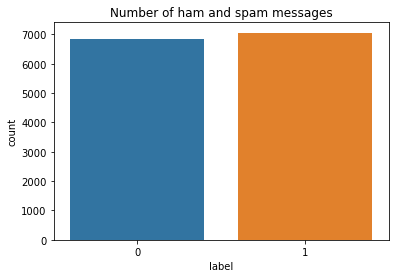

In [124]:
# visualize the data
sns.countplot(data['label'])
plt.xlabel('label')
plt.title('Number of ham and spam messages')
 

In [125]:
# chi square test of bow
from sklearn.feature_selection import chi2, SelectKBest
bow = cv.fit_transform(X_train)
selector = SelectKBest(chi2, k=1000)
X_new = selector.fit_transform(bow, y_train)
print(X_new.shape)
print(bow.shape)

(13891, 1000)
(13891, 25537)


(13891, 1000)
(13891, 25537)


d:\yanbo\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


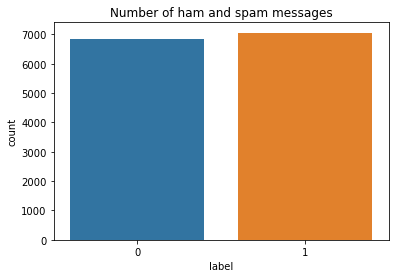

In [126]:
# visualize the 
X_train_counts = selector.get_feature_names_out()
# print(X_train_counts)

# visualize the data
sns.countplot(data['label'])
plt.xlabel('label')
plt.title('Number of ham and spam messages')

# chi square test of bow
from sklearn.feature_selection import chi2, SelectKBest
selector = SelectKBest(chi2, k=1000)
X_new = selector.fit_transform(bow, y_train)
print(X_new.shape)
print(bow.shape)

# visualize the
X_train_counts = selector.get_feature_names_out()
# print(X_train_counts)